In [3]:
from skimage.transform import resize
import numpy as np
from skimage import io
from skimage.measure import label
import matplotlib.pyplot as plt
import matplotlib
from keras.models import load_model

model = load_model('./myModel.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
__________

<class 'numpy.ndarray'> (432, 520, 3) (432, 520)
<class 'numpy.ndarray'> (432, 520, 3)
(432, 520, 3) (432, 520) 0 255 (432, 520) 0 1


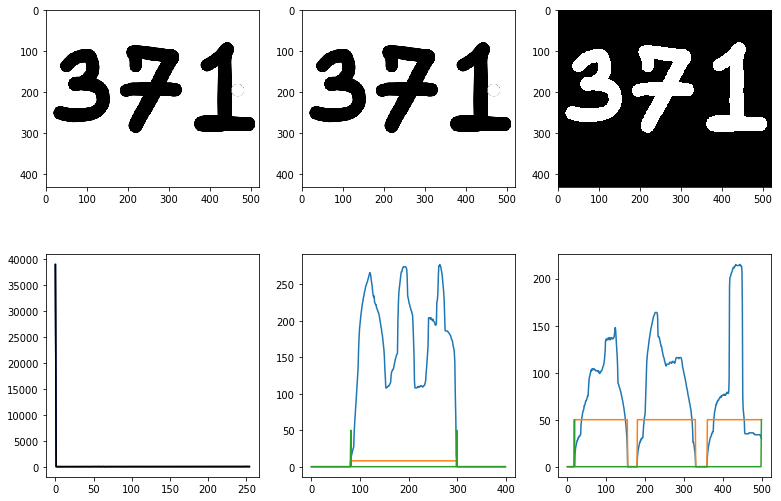

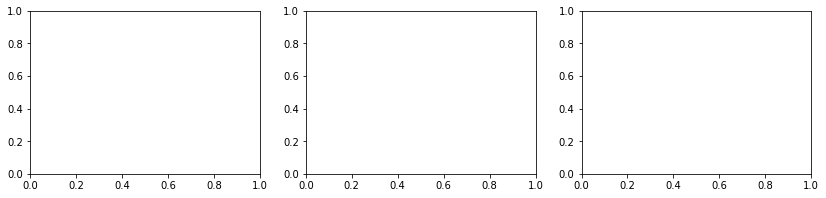

371


/opt/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [23]:
import numpy as np
from skimage import io
from skimage.measure import label
import matplotlib.pyplot as plt

img = io.imread("371.png")
gimg = (img[:,:,0]*0.3 + img[:,:,1]*0.6 + img[:,:,2]*0.1).astype(np.ubyte)
bimg = np.zeros(gimg.shape,np.ubyte)
bimg[gimg<50] = 1

print(type(img), img.shape, gimg.shape)

hR = np.array([ np.sum(img[:,:,0]==i) for i in range(255)])
hG = np.array([ np.sum(img[:,:,1]==i) for i in range(255)])
hB = np.array([ np.sum(img[:,:,2]==i) for i in range(255)])

hGray = np.array([np.sum(gimg==i) for i in range(255)])
hX = np.array([np.sum(bimg[:,i]==1) for i in range(500)])
hY = np.array([np.sum(bimg[i,:]==1) for i in range(400)])
print(type(img), img.shape)
print(img.shape, gimg.shape, np.min(gimg), np.max(gimg), bimg.shape, np.min(bimg), np.max(bimg))

_hY = np.array([np.sum(bimg[i,:]==1) for i in range(400)])
_hY[_hY<5] = 0
_hY[_hY>=8] = 8

P = label(_hY)
S = np.array([ [i,np.sum(P==i)] for i in np.unique(P)[1:]])
A = np.argwhere(P==S[np.argmax(S[:,1])][0])

hC = np.zeros(_hY.shape[0])
hC[[A[0][0],A[-1][0]]] =50
bimg[:A[0][0],:] = 0
bimg[A[-1][0]+3:,:] = 0

hX = np.array([np.sum(bimg[:,i]==1) for i in range(500)])
_hX = np.copy(hX)
_hX[_hX>=1] = 50
Q = label(_hX)
T = np.array([ [i,np.sum(Q==i)] for i in np.unique(Q)[1:] if np.sum(Q==i)>1 ])
B = [ tuple(np.argwhere(Q==a)[[0,-1]].reshape(2)) for a,b in T]

hD =  np.zeros(_hX.shape[0])
hD[[B[0][0],B[-1][-1]]] = 50

bimg[:A[0][0],:] = 0
bimg[A[-1][0]+3:,:] = 0


fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(13, 9))
ax[0,0].imshow(img)
ax[0,1].imshow(gimg, cmap="gray")
ax[0,2].imshow(bimg, cmap="gray")
ax[1,0].plot(hR,color = '#ff0000')
ax[1,0].plot(hG,color = '#00ff00')
ax[1,0].plot(hB,color = '#0000ff')
ax[1,0].plot(hGray,color = '#000000')
ax[1,1].plot(hY)
ax[1,1].plot(_hY)
ax[1,1].plot(hC)
ax[1,2].plot(hX)
ax[1,2].plot(_hX)
ax[1,2].plot(hD)

count = 0

fig, ax = plt.subplots(ncols=len(B), nrows=1, figsize=(14, 3))
for i, (x1,x2) in enumerate(B):

    matplotlib.image.imsave(str(i)+".png",gimg[A[0][0]:A[-1][0]+2, x1:x2+1])
    count += 1
plt.show()
plt.close()

string = ""
clist = list(range(0, count))

for i in clist:
    img = io.imread(str(i)+".png")
    img28 = resize(img, (28,28), mode = "constant")
    imgG = np.abs(1-(img28[:,:,0]*0.3+img28[:,:,1]*0.6+img28[:,:,2]*0.1))

    L = model.predict(imgG.reshape(-1,28,28,1))
    S =np.argmax(L)
    
    string = string + str(S)
print(string)